In [197]:
#Hood College - Data Mining
#Final Project
#T. S. Zimmerman
#Dec-2018
#Use various algorthms to determine quiality of WHITE WINE based on minimal feature sets

#Import required templates & libraries for decision tree, math and graphing#Importing required packages.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import vpython as vs

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from time import time
from IPython.display import display

%matplotlib inline

In [198]:
#Loading dataset
wine = pd.read_csv('../tscottzimmerman/Desktop/WineQualityData/winequality-white.csv')

In [199]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [200]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


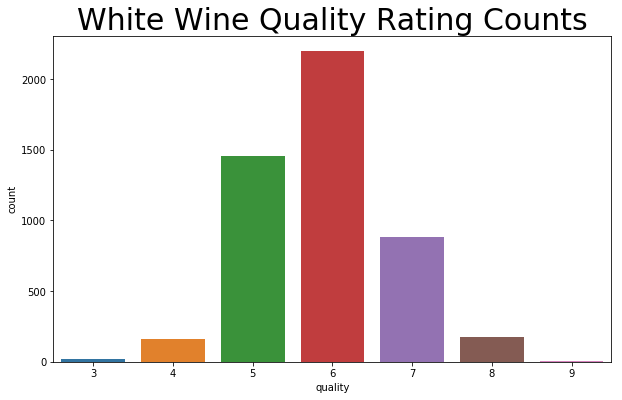

In [201]:
#display bar chart of distribution of quality feature
fig = plt.figure(figsize = (10,6))
sns.countplot(wine['quality'],label="Count")
plt.title('White Wine Quality Rating Counts', fontsize=30)
plt.show()

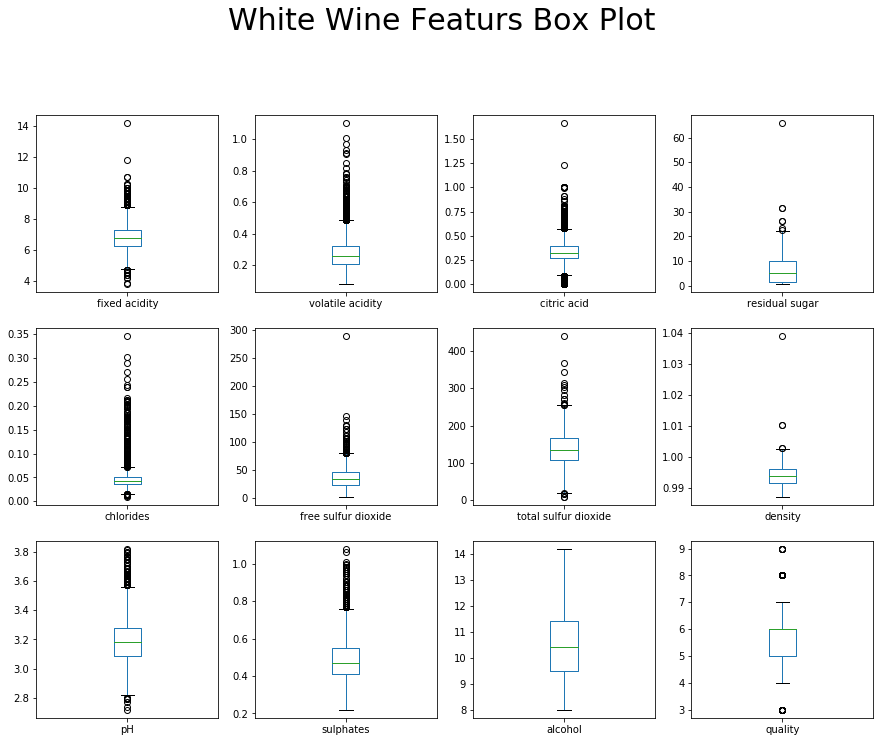

In [202]:
#display box plot of each wine feature and quality ratings

wine.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), 
                                        title='Box Plot for each input variable')
plt.suptitle('White Wine Featurs Box Plot', fontsize=30)
plt.savefig('class_box')
plt.show()

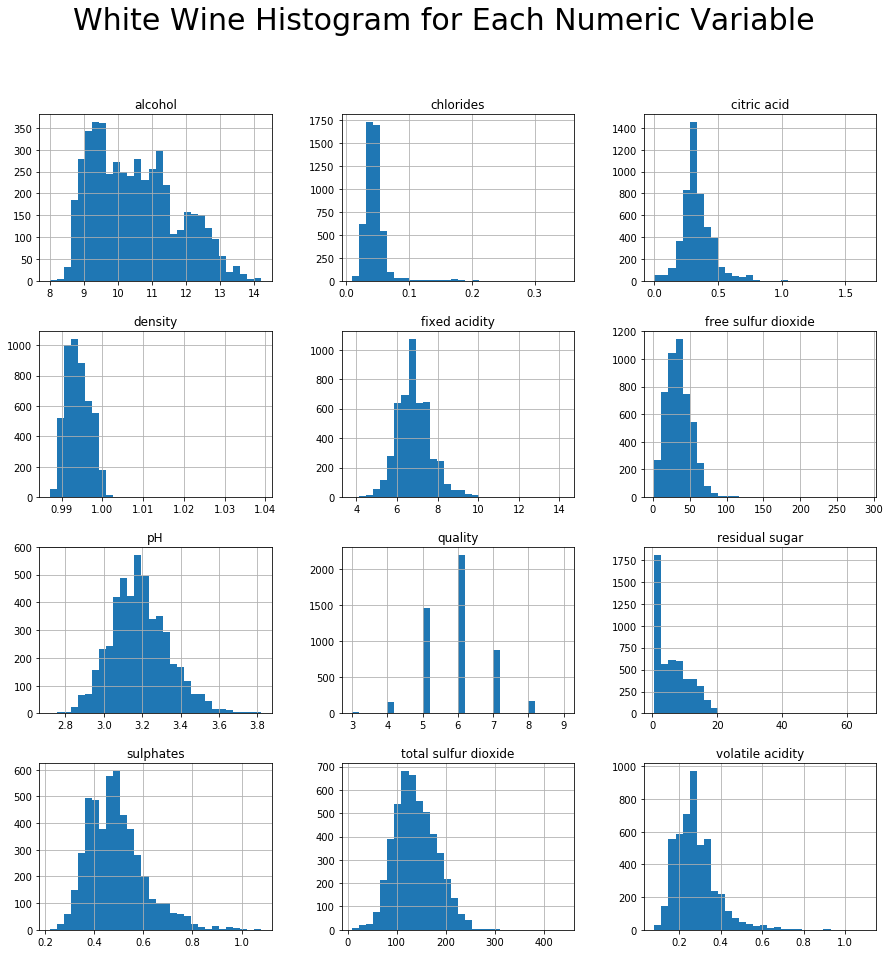

In [203]:
#display a histogram or bar chart on ratings and counts of buckets or 30 groupings

import pylab as pl
wine.hist(bins=30, figsize=(15,15))
pl.suptitle("White Wine Histogram for Each Numeric Variable", fontsize = 30)
plt.savefig('data_hist')
plt.show()

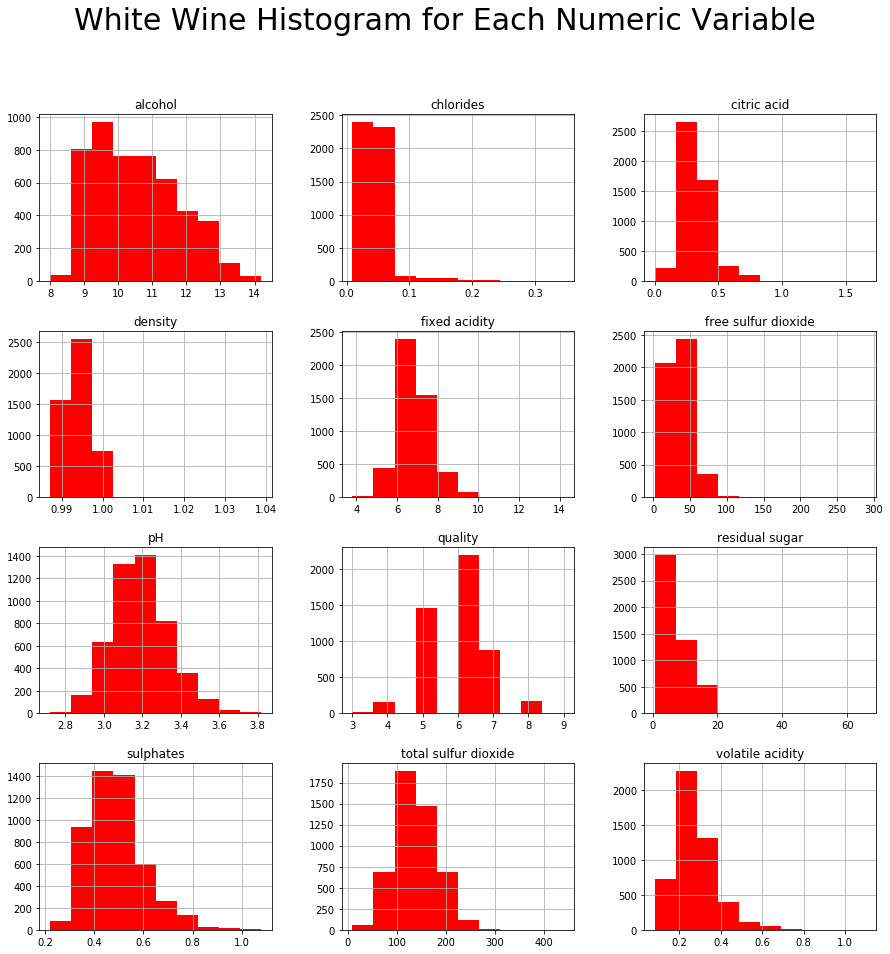

In [204]:
#display a histogram or bar chart on ratings and counts of buckets or 30 groupings
import pylab as pl
wine.hist(bins=10, figsize=(15,15),color='red')
pl.suptitle("White Wine Histogram for Each Numeric Variable", fontsize = 30)
plt.savefig('data_hist')
plt.show()

/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


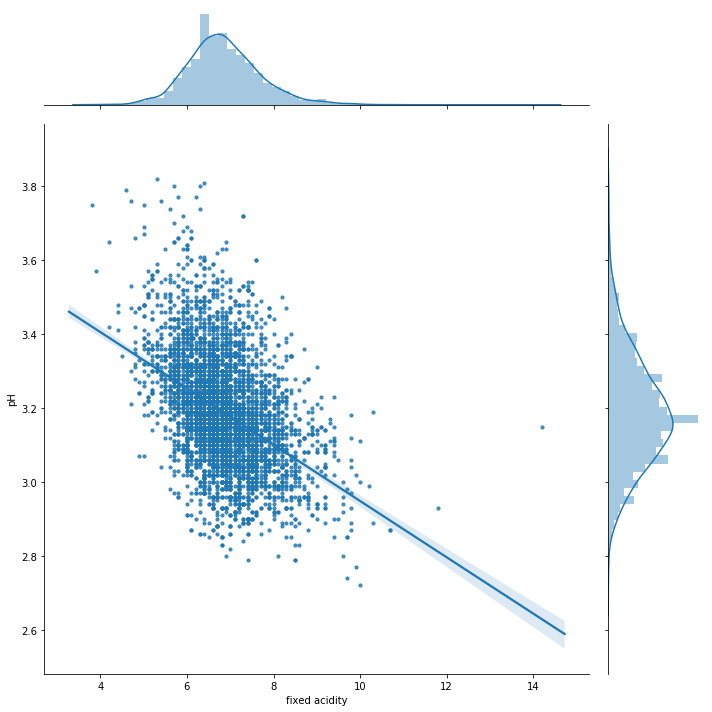

In [205]:
#Visualize the co-relation between pH and fixed Acidity
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = wine[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=10)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


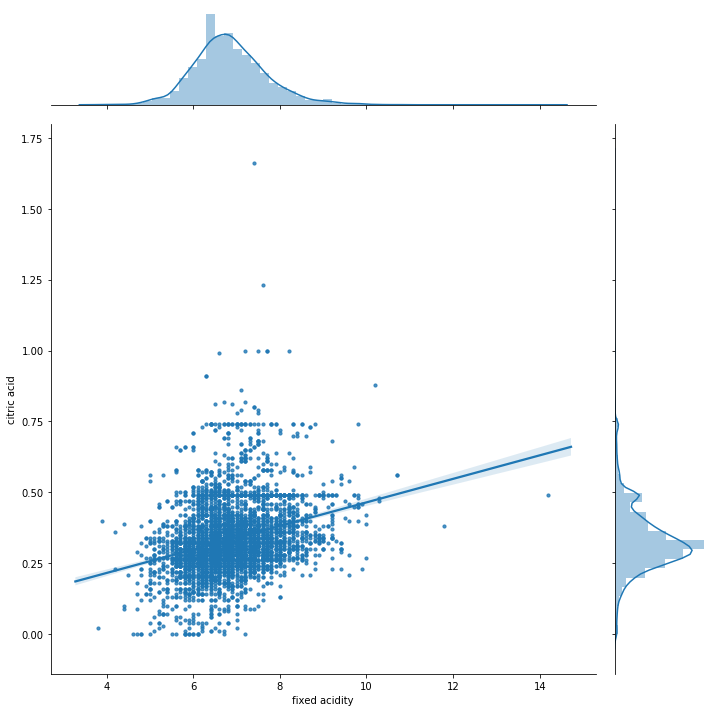

In [206]:
#VISUALIZE COORELATION BETWEEN CITRIC ACID AND FIXED ACIDITY FOR WHITE WINE
fixedAcidity_citricAcid = wine[['citric acid', 'fixed acidity']]
g = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_citricAcid, size=10)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

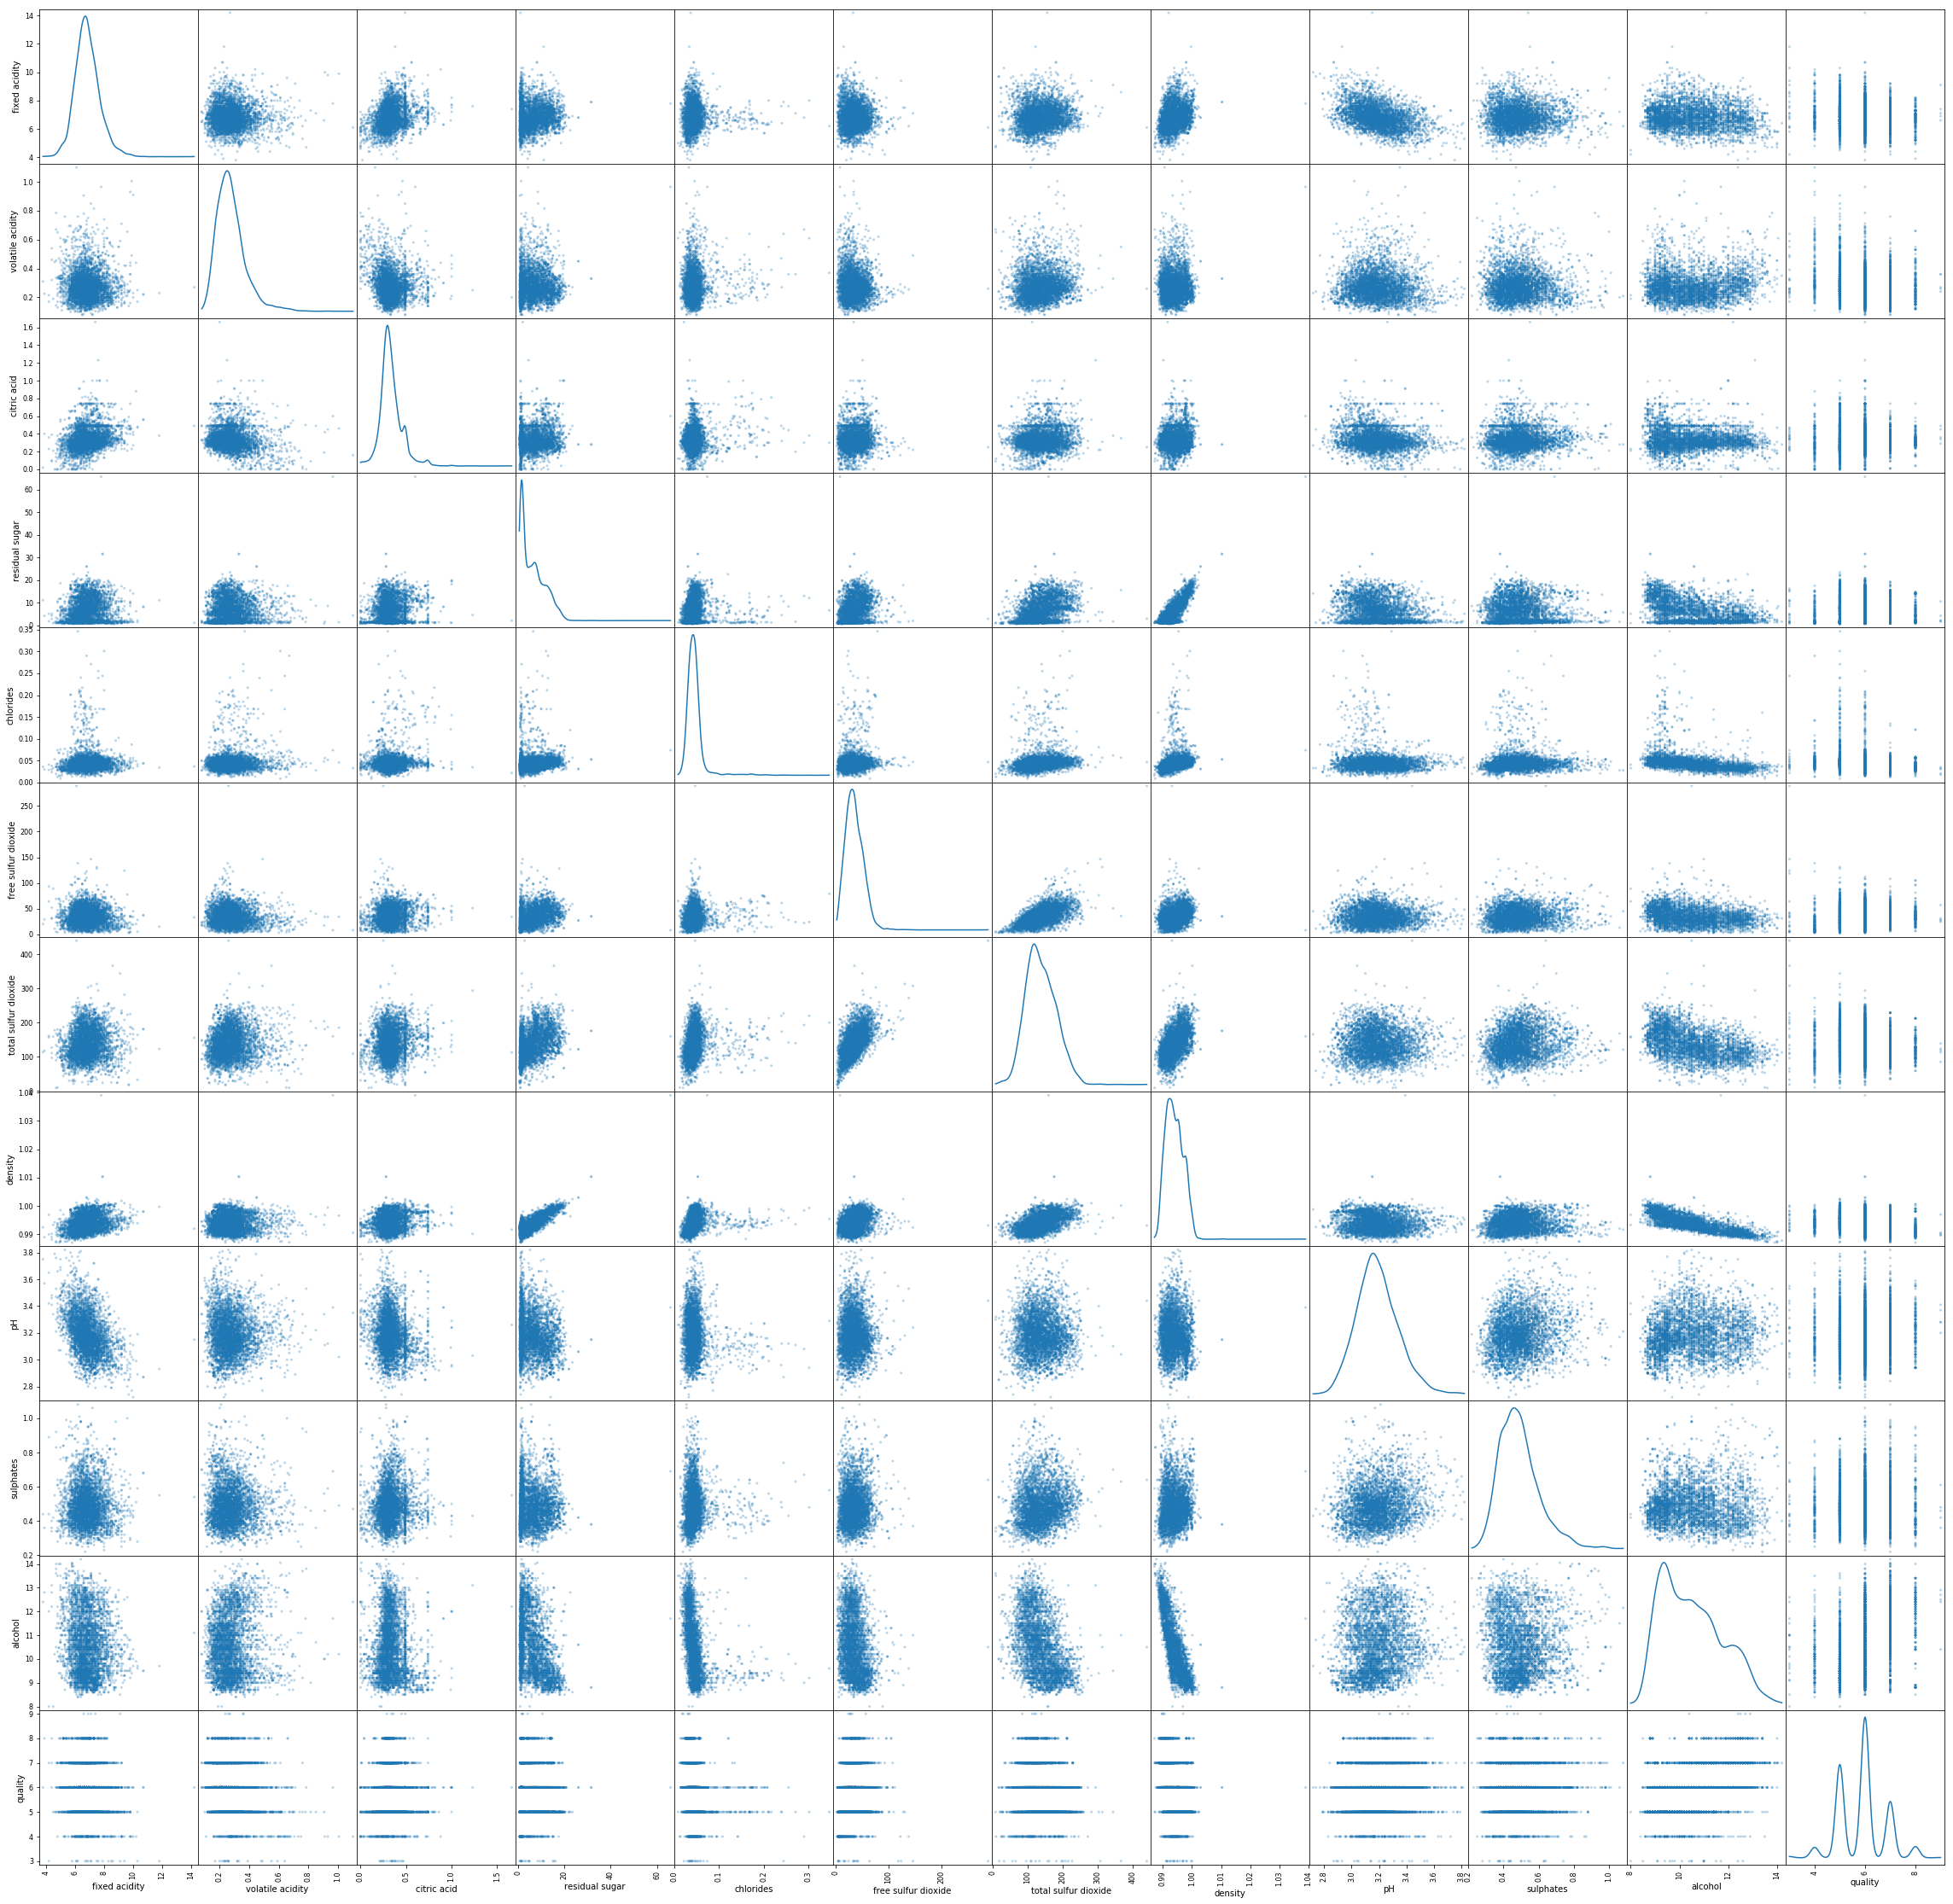

In [207]:
#COORELATE ALL FEATURES ON SCATTER DIAGRAM TO DETERMINE COORELATIONS IF ANY

pd.plotting.scatter_matrix(wine, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

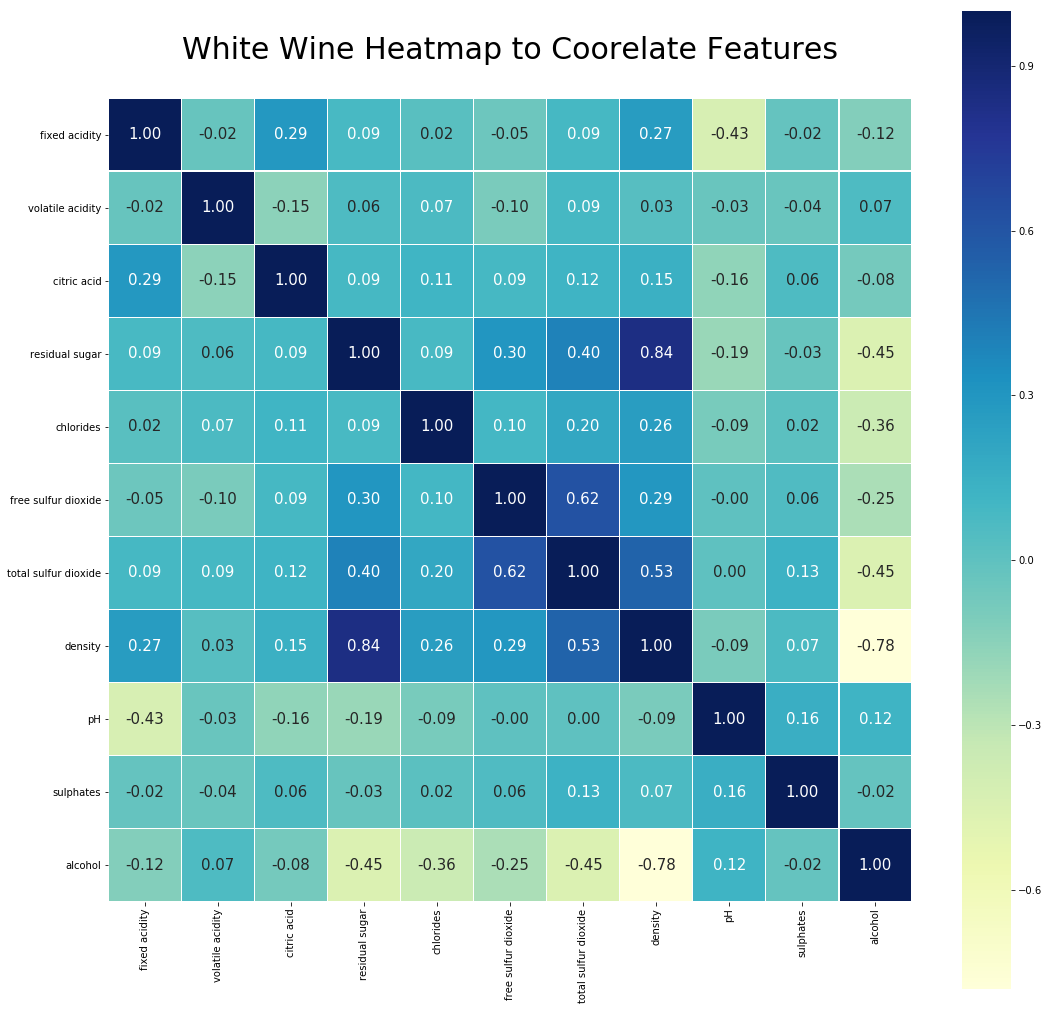

In [208]:
# build a HEAT MAP graph to check correlation between features
features_mean=list(wine.columns[0:11])

corr = wine[features_mean].corr() #corr used to find correlation
plt.figure(figsize=(18,18))
pl.title("White Wine Heatmap to Coorelate Features\n", fontsize = 30)
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'YlGnBu', linewidths=0.5)

In [209]:
#print statistics on fixed acidity

wine['fixed acidity'].describe()

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64

Text(0.5,1,'White Wine Fixed Acidity to Quality')

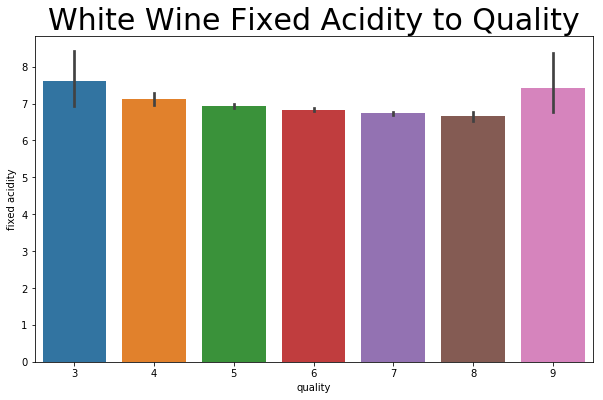

In [210]:
#Here we see that fixed acidity declines through Q 8 then increases at 9 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine,).set_title('White Wine Fixed Acidity to Quality',fontsize=30)

In [211]:
#print statistics on volatile acidity

wine['volatile acidity'].describe()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64

Text(0.5,1,'White Wine Volatile Acidity to Quality')

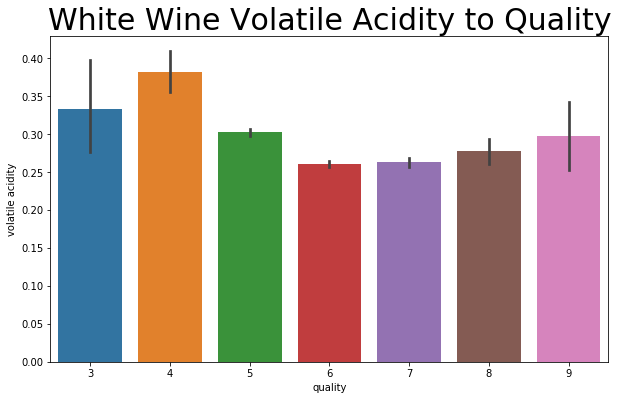

In [212]:
#Here we see inversete gaussian cure for volatile acidity 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine).set_title('White Wine Volatile Acidity to Quality', fontsize=30)

In [213]:
#print statistics on citric acid

wine['citric acid'].describe()

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

Text(0.5,1,'White Wine Citric Acid to Quality')

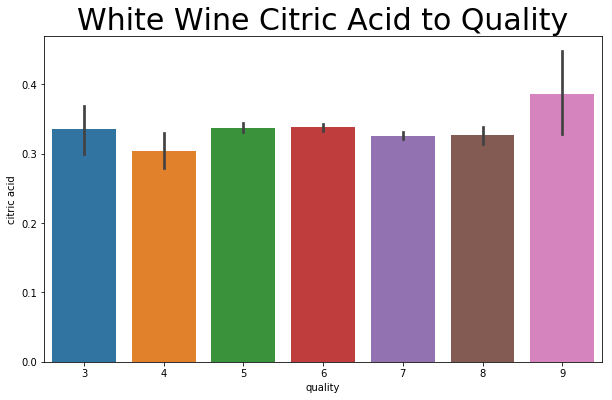

In [214]:
#Composition of citric acid is not trended to quality for white wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine).set_title('White Wine Citric Acid to Quality', fontsize=30)

In [215]:
#print statistics on residual sugar

wine['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

Text(0.5,1,'White Wine Residual Sugar to Quality')

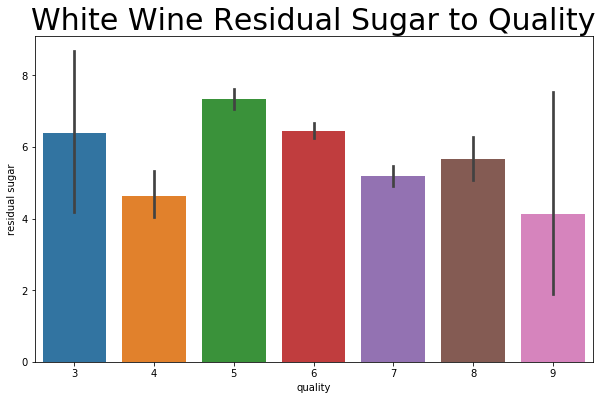

In [216]:
#residual sugar is not trended for quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine).set_title('White Wine Residual Sugar to Quality', fontsize=30)

In [217]:
#print statistics on chlorides

wine['chlorides'].describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

Text(0.5,1,'White Wine Chlorides to Quality')

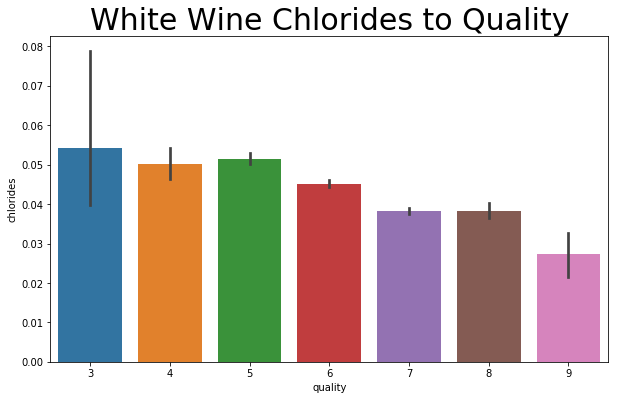

In [218]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine).set_title('White Wine Chlorides to Quality', fontsize=30)

In [219]:
#print statistics on free sulfur dioxide

wine['free sulfur dioxide'].describe()

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

Text(0.5,1,'White Wine Free Sulfur Dioxide to Quality')

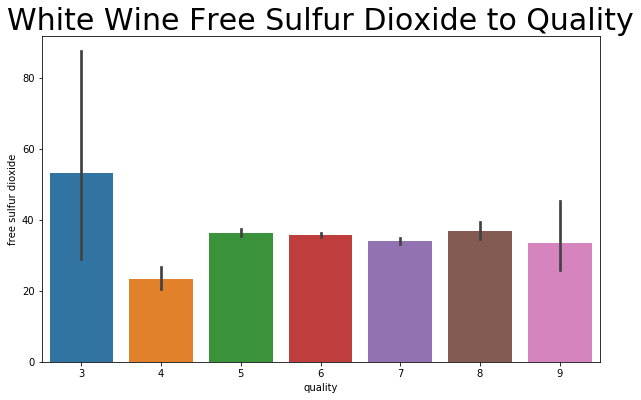

In [220]:
#Free Sulfur Dioxide to quality does not trend
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine).set_title('White Wine Free Sulfur Dioxide to Quality', fontsize=30)

In [221]:
#print statistics on total sulfur dioxide

wine['total sulfur dioxide'].describe()

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

Text(0.5,1,'White Wine Total Sulfur Dioxide to Quality')

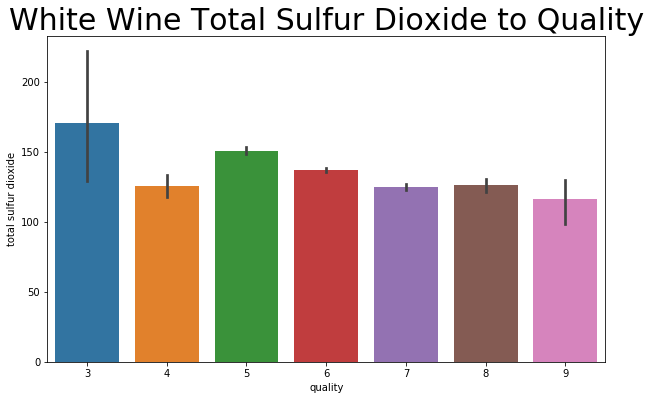

In [222]:
#Total Sulfur Dioxide does decline and quality improve except for Q 4

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine).set_title('White Wine Total Sulfur Dioxide to Quality', fontsize=30)

In [223]:
#print statistics on density

wine['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

Text(0.5,1,'White Wine Density to Quality')

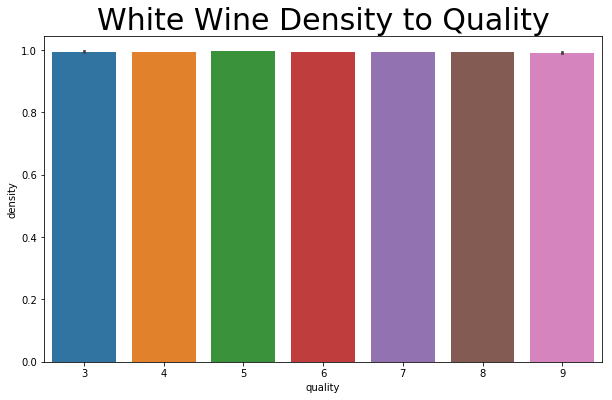

In [224]:
#Density flat lines as quality improved
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine).set_title('White Wine Density to Quality', fontsize=30)

In [225]:
#print statistics on pH

wine['pH'].describe()

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

Text(0.5,1,'White Wine pH to Quality')

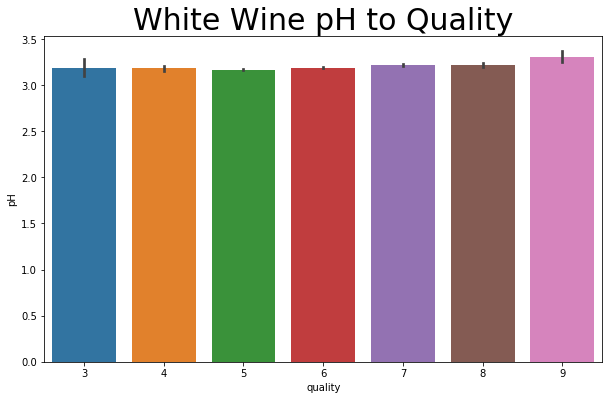

In [226]:
#Sulphates level goes slightly higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine).set_title('White Wine pH to Quality', fontsize=30)

In [227]:
#print statistics on sulphates

wine['sulphates'].describe()

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

Text(0.5,1,'White Wine Sulphates to Quality')

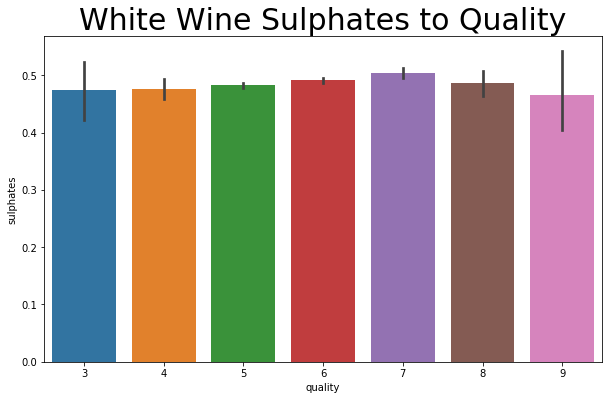

In [228]:
#Sulphates level goes higher with the quality of wine until you get to Q8 and Q9
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine).set_title('White Wine Sulphates to Quality', fontsize=30)

In [229]:
#print statistics on alcohol

wine['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

Text(0.5,1,'White Wine Alcohol to Quality')

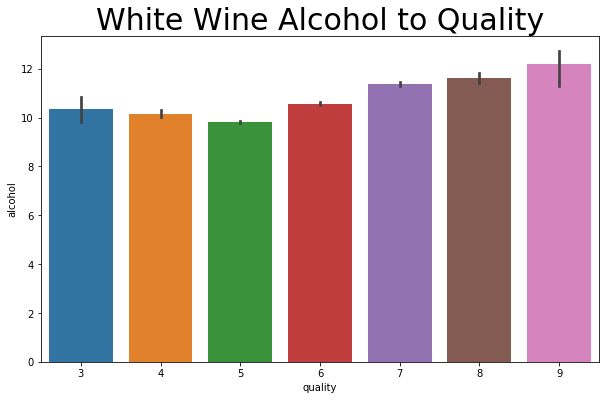

In [230]:
#Alcohol level also goes significantly higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine).set_title('White Wine Alcohol to Quality', fontsize=30)

In [231]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['Mediocre', 'Fine']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)


In [232]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [233]:
# becomes 1 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [234]:
wine['quality'].value_counts()

1    3838
0    1060
Name: quality, dtype: int64

Text(0.5,1,'White Wine Fine vs. Mediocre')

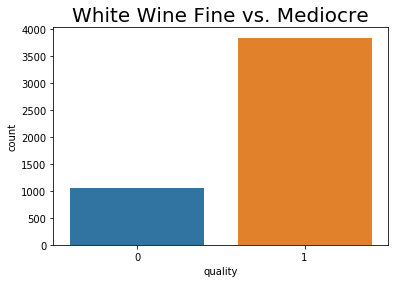

In [235]:
sns.countplot(wine['quality']).set_title('White Wine Fine vs. Mediocre', fontsize=20)

In [236]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [237]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [238]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [239]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [240]:
#import decision tree template from sklearn library
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)

In [241]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [242]:
#fit model to training data set

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [243]:
wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [244]:
#provide classification accuracy score

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.81


In [245]:
#Display confusion grid

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_predict),
        columns=['Predicted Fine Quality', 'Predicted Mediocre Quality'], 
        index=['True Fine Quality', 'True Mediocre Quality']
    )

,Predicted Fine Quality,Predicted Mediocre Quality
True Fine Quality,100,116
True Mediocre Quality,68,696


In [246]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render()

'Source.gv.pdf'

In [247]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


In [248]:
#Display confusion grid

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_predict),
        columns=['Predicted Fine Quality', 'Predicted Mediocre Quality'], 
        index=['True Fine Quality', 'True Mediocre Quality']
    )

,Predicted Fine Quality,Predicted Mediocre Quality
True Fine Quality,100,116
True Mediocre Quality,68,696


In [249]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


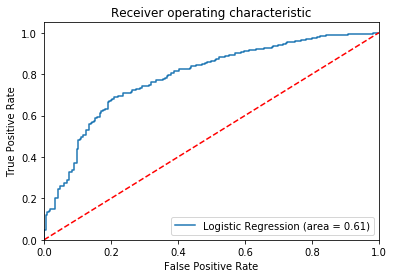

In [250]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [251]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.83


In [252]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.80
Accuracy of LDA classifier on test set: 0.80


In [253]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.73
Accuracy of GNB classifier on test set: 0.73


In [254]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.83


In [255]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [372]:
#Reduce the number of features to detemine minimum features to drive similar or better predictions
#Dropping 'density'
wine = wine[['chlorides','quality']]

In [373]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 2 columns):
chlorides    4898 non-null float64
quality      4898 non-null int64
dtypes: float64(1), int64(1)
memory usage: 76.6 KB


In [374]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [375]:
#Train and Test splitting of data 20% test 80%training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [376]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [377]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [378]:
#import decision tree template from sklearn library
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)

In [379]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [380]:
#fit model to training data set

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [381]:
#provide classification accuracy score and display the results

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.79
Accuracy of Decision Tree classifier on test set: 0.78


In [382]:
#Display confusion grid

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_predict),
        columns=['Predicted Bad Quality', 'Predicted Good Quality'], 
        index=['True Bad Quality', 'True Good Quality']
    )

,Predicted Bad Quality,Predicted Good Quality
True Bad Quality,2,214
True Good Quality,0,764


In [383]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.73
